In [2]:
##Module : COVID Data analysis
#Author  : DBN
#Date    : 21-Nov-21

#Import Modules

try:
        import pandas as pd 
        import numpy as np 
        import seaborn as sns
        import matplotlib.pyplot as plt 
        from pandas.tseries.offsets import MonthEnd
        import calendar
        print('Modules are imported.') 
except Exception as e:
        print(e)  

Modules are imported.


In [3]:
#import input file and create datasets

try:
    src_data    = pd.read_csv("yourfile.csv")
    
    #basic cleanup & renaming
    data_main   = src_data.rename(columns={'Country/Region':'Country_Region','Province/State':'Province_State'})
    
    #remove nulls in numeric columns
    #convert blanks in numeric columns to zero
    
    cols = ["Confirmed","Recovered","Deaths"]
    data_main[cols] = data_main[cols].replace(np.nan,0)
    
    
    convert_dict = {'Confirmed': int,'Recovered': int,'Deaths':int}
    data_main = data_main.astype(convert_dict)
    
    #index_by_date : to be used later for insert/update
    data_by_date=data_main.set_index('Date')
 
    
    rows_loaded = "No., of rows loaded :" + str(data_main.shape[0])
    #later to be used to validate if all rows are inserted from src

    
    #without_province column dataset as some countries do not have province
    data_without_provice = data_main.drop('Province_State',axis='columns')
    

    data_without_provice['Month'] = pd.DatetimeIndex(data_without_provice['Date']).month
    data_without_provice['Year'] = pd.DatetimeIndex(data_without_provice['Date']).year
    data_without_provice['Month'] = data_without_provice['Month'].apply(lambda x: calendar.month_abbr[x])
    
    
    w_dataset_1 = pd.DataFrame(data_without_provice)
    #dataset_1.set_index(['Date'],inplace=True)  

    
    #withproovince - countries with province
    country_with_province = data_main.dropna(subset=['Province_State'],how='all')
    
    
except Exception as e:
    print(e)  

In [4]:
#total confirmed, recovered and death as of latest data
try:
  
    ws_1 = w_dataset_1.drop(['Date','Recovered','Month','Year'], axis='columns')
    ws_1.reset_index(inplace=True)
    ws_1 = ws_1.loc[ws_1.groupby('Country_Region')['Confirmed'].idxmax()]
    ws_1 = ws_1.drop(['index'], axis='columns')
    #total_recovered
    ws_2 = w_dataset_1.drop(['Date','Confirmed','Deaths','Month','Year'], axis='columns')
    ws_3 = ws_2.loc[ws_2.groupby('Country_Region')['Recovered'].idxmax()]

    total_latest = ws_1.merge(ws_3,on='Country_Region')
    
except Exception as e:
    print(e)

In [5]:
print('Top 10 countries with highest cases ')
top_10=total_latest.nlargest(10,['Confirmed'])
top_10.reset_index(inplace=True)
top_10 = top_10.drop(['index'], axis='columns')
top_10

Top 10 countries with highest cases 


,Country_Region,Confirmed,Deaths,Recovered
0,US,47221549,764363,6298082
1,India,34447536,463655,30974748
2,Brazil,21960766,611346,17771228
3,United Kingdom,9600369,142945,8322
4,Russia,8956136,251796,5609682
5,Turkey,8433988,73746,5478185
6,France,7109125,115795,342647
7,Iran,6045212,128272,3444798
8,Argentina,5307159,116250,4615834
9,Germany,5091200,97986,3659260


<AxesSubplot:>

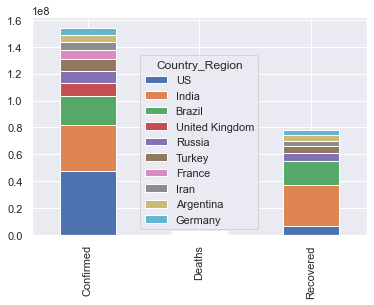

In [5]:
sns.set()
top_10.set_index('Country_Region').T.plot(kind='bar', stacked=True)

In [ ]:
#consolidate data as per month,year and country
#try:
    #last_day_month = max(w_dataset_1['Date'])
    #w_dataset_1['EndOfMonth'] = pd.to_datetime(w_dataset_1['Date']) + MonthEnd(0)
    #w_dataset_1['Flag'] = np.where(w_dataset_1['Date']==w_dataset_1['EndOfMonth'], 'True','False')  
    #w_dataset_2 = w_dataset_1[w_dataset_1.Flag != 'False']

    #final_1 = w_dataset_2.drop(['EndOfMonth', 'Flag'], axis='columns')
    #final_1.set_index('Country_Region')

    
#except Exception as e:
    #print(e) 